## <font color='5499C7'>Data </font> 



#### <font color='5499C7'>data files </font> 



link for dataset https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

- Heart.csv 
- o2Saturation.csv

####  <font color='5499C7'>Description of the Fields </font> 


- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attackn

## <font color='5499C7'>import Libraries </font> 



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


## <font color='5499C7'>EDA</font> 



In [ ]:
# read the csv

heart = pd.read_csv('/content/drive/MyDrive/WTF-colab/heart.csv')
o2Saturation = pd.read_csv ('/content/drive/MyDrive/WTF-colab/o2Saturation.csv')

In [ ]:
heart.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
o2Saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [ ]:
df = pd.merge (heart,o2Saturation ,left_index=True, right_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
 14  98.6      303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 37.9 KB


In [ ]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6


In [ ]:
# rename the columns to be more readable
df.rename(columns = {'cp':'ChestPaintype', 'trtbps':'RestingBloodPressure', 'fbs':'FastingBloodSugar', 'thalachh':'MaxHeartRate', 
                     'exng':'ExInducedAngina', 'slp':'slope', 'caa':'MajorVessels', 'thall':'ThaliumStressResult'
                     , '98.6':'o2Saturation'}, inplace = True)

In [ ]:
df.head()

,age,sex,ChestPaintype,RestingBloodPressure,chol,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [ ]:
# check for null 
#df.isna().sum()

df.isnull().sum()

age                     0
sex                     0
ChestPaintype           0
RestingBloodPressure    0
chol                    0
FastingBloodSugar       0
restecg                 0
MaxHeartRate            0
ExInducedAngina         0
oldpeak                 0
slope                   0
MajorVessels            0
ThaliumStressResult     0
output                  0
o2Saturation            0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df= df.drop_duplicates()

## ==>  There are no missing value in this dataset.




In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
ChestPaintype,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
RestingBloodPressure,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
FastingBloodSugar,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
MaxHeartRate,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
ExInducedAngina,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


## ==> The average blood pressure of an individual is 130 whereas the maximun value goes upto 200.
## ==> The average heart rate of the group is 150, whereas overall it ranges between 133 to 202
## ==> Age  varies from 29 to 77 and the mean age is 55
## ==> The highest cholestrol level is 564 and the lowest is 126 average is 246 

In [ ]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

##  => considering 1 for Male 0 for Female 

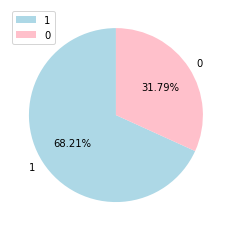

In [ ]:
labels=df['sex'].value_counts().index

plt.pie(df['sex'].value_counts(),labels=labels,
        autopct='%1.2f%%',colors=['lightblue','pink'], startangle=90)
plt.legend();

In [ ]:
df['ChestPaintype'].value_counts()

0    143
2     86
1     50
3     23
Name: ChestPaintype, dtype: int64

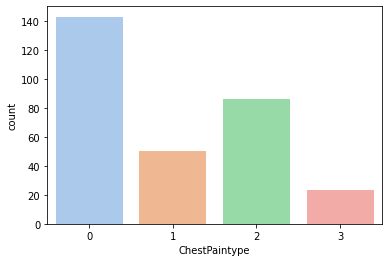

In [ ]:
sns.countplot(x='ChestPaintype', data=df, palette='pastel')

## ==> cp : Chest Pain type chest pain type

* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic
## ==> People of chest pain category '0' have the highest count, whereas of count of chest pain '3' is the lowest

In [ ]:
df['FastingBloodSugar'].value_counts()


0    257
1     45
Name: FastingBloodSugar, dtype: int64

## ==>  we have 45 people who are diabetics 

In [ ]:
temp = df[df['FastingBloodSugar']==1]
temp['sex'].value_counts()

1    33
0    12
Name: sex, dtype: int64

## ==> for people with diabetics we have 33 male and 12 female

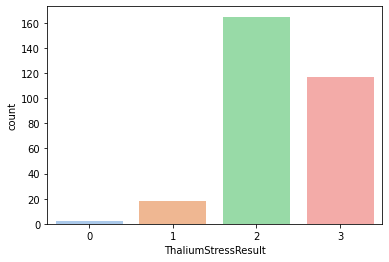

In [ ]:
#Distribution of ThaliumStressResult
sns.countplot(x='ThaliumStressResult', data=df, palette='pastel')


## ==> ThaliumStressResult is maximum for type 2 ( 165 ) and min for type 0 ( 2 ) .

In [ ]:
#resting electrocardiographic results
df['restecg'].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

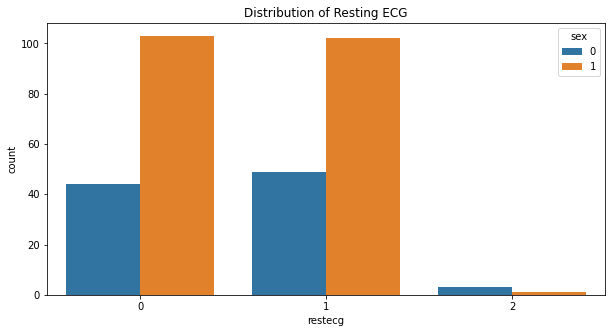

In [ ]:
#Distribution of Resting ECG

plt.figure(figsize=(10,5))
sns.countplot(x ='restecg', data = df ,hue='sex')
plt.title('Distribution of Resting ECG')
plt.show()

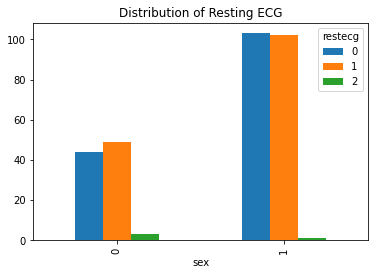

In [ ]:
pd.crosstab(df.sex, df.restecg).plot(kind='bar', title ='Distribution of Resting ECG')

## ==> female in category 1 Rest ECG is the heighst 
* Normal: Normal,
* ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
* LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

## ==> resting electrocardiographic results is almost the same for type 0 and 1.
## Also, its almost negligible for type 2 in comparision to type 0 and 1.

### Slope Analysis 

In [ ]:
df['slope'].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

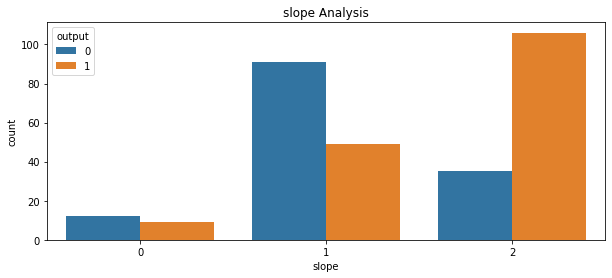

In [ ]:
fig,ax=plt.subplots(figsize=(10,4))
#countplot for Holiday and y
sns.countplot(x ='slope', data = df ,hue='output')
ax.set_title('slope Analysis')
plt.show()

### ==> When Slope is 2 it's a sign for Heart disease

In [ ]:
# get number of unique in each column 
df.nunique()

age                      41
sex                       2
ChestPaintype             4
RestingBloodPressure     49
chol                    152
FastingBloodSugar         2
restecg                   3
MaxHeartRate             91
ExInducedAngina           2
oldpeak                  40
slope                     3
MajorVessels              5
ThaliumStressResult       4
output                    2
o2Saturation              7
dtype: int64

In [ ]:
# get number of unique in each column 

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

dict

{'age': 41,
 'sex': 2,
 'ChestPaintype': 4,
 'RestingBloodPressure': 49,
 'chol': 152,
 'FastingBloodSugar': 2,
 'restecg': 3,
 'MaxHeartRate': 91,
 'ExInducedAngina': 2,
 'oldpeak': 40,
 'slope': 3,
 'MajorVessels': 5,
 'ThaliumStressResult': 4,
 'output': 2,
 'o2Saturation': 7}

In [ ]:
df.head(2)

,age,sex,ChestPaintype,RestingBloodPressure,chol,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6


In [ ]:

cat_cols = ['sex','ExInducedAngina','MajorVessels','ChestPaintype','FastingBloodSugar','restecg','slope','ThaliumStressResult']
num_col = ["age","RestingBloodPressure","chol","MaxHeartRate","oldpeak",'o2Saturation']
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", num_col)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'ExInducedAngina', 'MajorVessels', 'ChestPaintype', 'FastingBloodSugar', 'restecg', 'slope', 'ThaliumStressResult']
The continuous cols are :  ['age', 'RestingBloodPressure', 'chol', 'MaxHeartRate', 'oldpeak', 'o2Saturation']
The target variable is :   ['output']


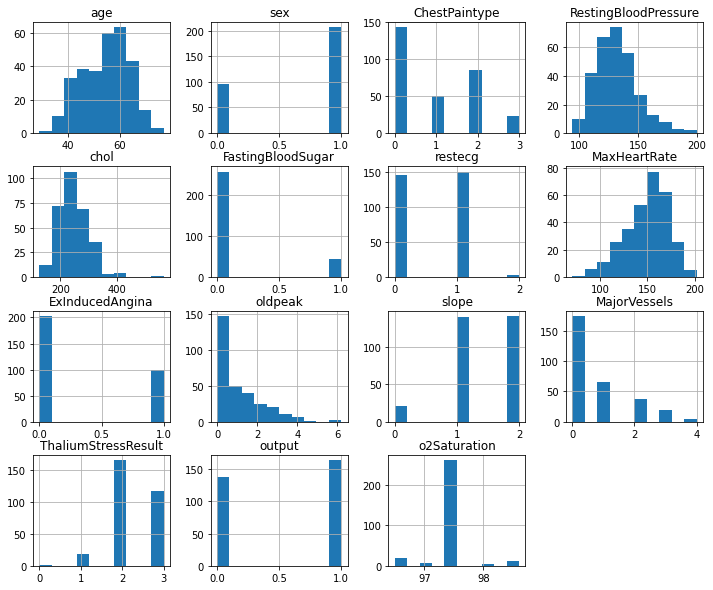

In [ ]:


df.hist(figsize=(12,10))
plt.show()

##### Detecting Outlier in continuous feature 

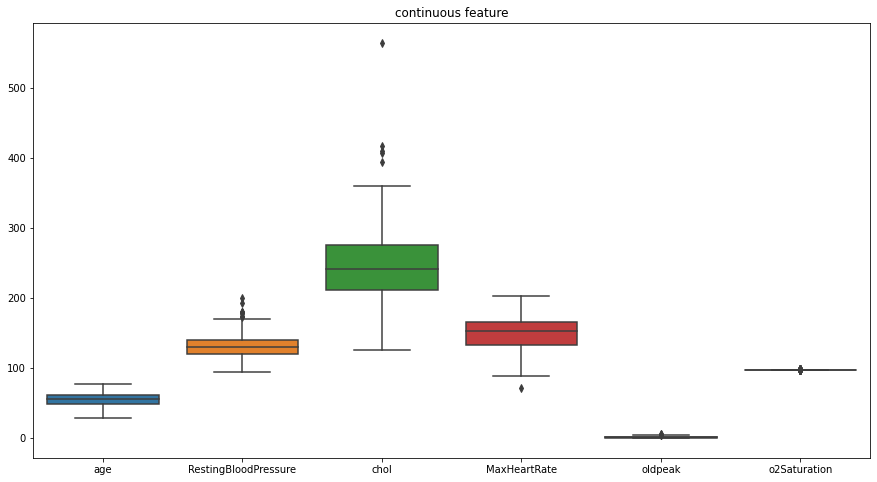

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[num_col])
ax.set_title('continuous feature')
plt.show()

## ==> There are some outliars for some features.

In [ ]:
# Q1 
q1 = df.quantile(0.25)
# Q3
q3 = df.quantile(0.75)
# IQR
IQR = q3 - q1
# Outlier range
upper = q3 + IQR * 1.5
lower = q1 - IQR * 1.5
upper_dict = upper.to_dict() 
lower_dict = lower.to_dict() 

In [ ]:
df['RestingBloodPressure'].replace(list(df[df['RestingBloodPressure'] > upper_dict['RestingBloodPressure']].RestingBloodPressure) ,upper_dict['RestingBloodPressure'],inplace=True)
df['chol'].replace(list(df[df['chol'] > upper_dict['chol']].chol) ,upper_dict['chol'],inplace=True)
df['MaxHeartRate'].replace(list(df[df['MaxHeartRate'] > upper_dict['MaxHeartRate']].oldpeak) ,upper_dict['MaxHeartRate'],inplace=True)

In [ ]:
df['RestingBloodPressure'].replace(list(df[df['RestingBloodPressure'] < lower_dict['RestingBloodPressure']].RestingBloodPressure) ,lower_dict['RestingBloodPressure'],inplace=True)
df['chol'].replace(list(df[df['chol'] < lower_dict['chol']].chol) ,lower_dict['chol'],inplace=True)
df['MaxHeartRate'].replace(list(df[df['MaxHeartRate'] < lower_dict['MaxHeartRate']].oldpeak) ,lower_dict['MaxHeartRate'],inplace=True)

In [ ]:
#log transformation to transform the ouliers to lower range

"""df["RestingBloodPressure"]= np.log(df.RestingBloodPressure)
df["chol"]= np.log(df.chol)
df["MaxHeartRate"]= np.log(df.MaxHeartRate)"""

'df["RestingBloodPressure"]= np.log(df.RestingBloodPressure)\ndf["chol"]= np.log(df.chol)\ndf["MaxHeartRate"]= np.log(df.MaxHeartRate)'

##### Correlation

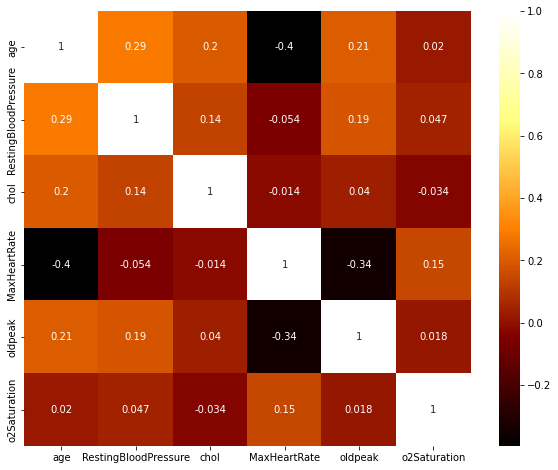

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(df[num_col].corr(), yticklabels='auto', annot=True, cmap=plt.cm.afmhot)
plt.show()

Density distribution for Age

<Figure size 720x720 with 0 Axes>

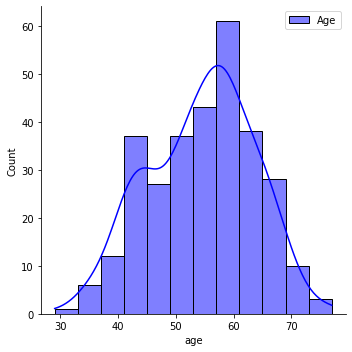

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(heart.age, color="blue", label="Age", kde= True)
plt.legend()

## ==> most of the data are age between 50 and 60

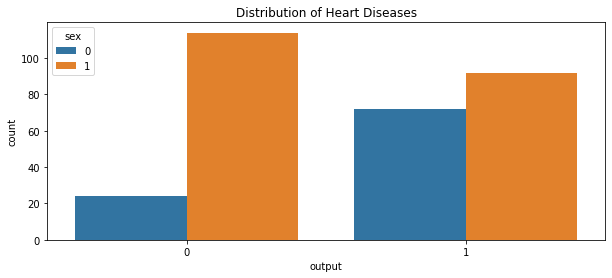

In [ ]:

fig,ax=plt.subplots(figsize=(10,4))
#countplot for Holiday and y
sns.countplot(x ='output', data = df ,hue='sex')
ax.set_title('Distribution of Heart Diseases')
plt.show()

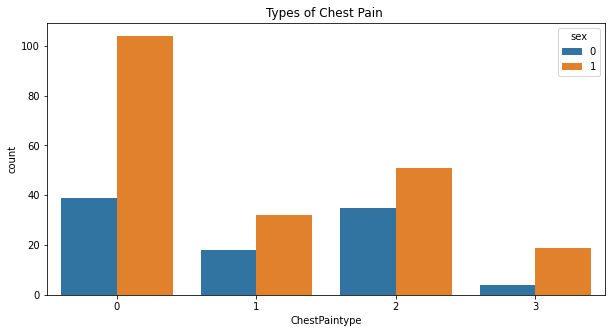

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x ='ChestPaintype', data = df ,hue='sex')
plt.title('Types of Chest Pain ')
plt.show()

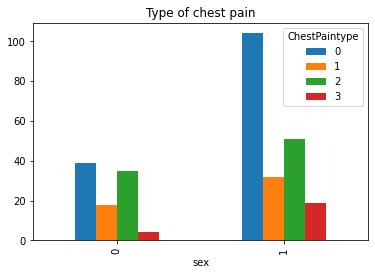

In [ ]:
pd.crosstab(df.sex, df.ChestPaintype).plot(kind='bar', title ='Type of chest pain')

## ==> most of our data are in chest pain type 0 and then 2 
## ==> chest pain is commone among male 
## == > category 3 is the least for both male and female 

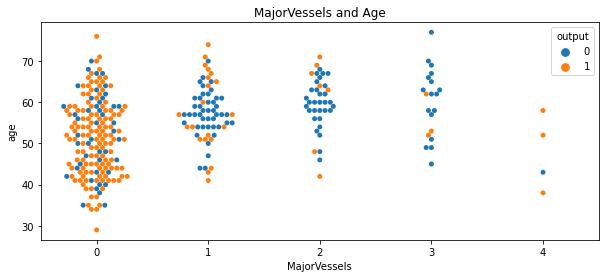

In [ ]:
# MajorVessels



fig,ax=plt.subplots(figsize=(10,4))
#countplot for Holiday and y
sns.swarmplot(x ='MajorVessels',y= 'age' ,data = df ,hue='output')
ax.set_title('MajorVessels and Age')
plt.show()


## ==> the risk is high in category (0,4 )
## people belonging to category '0' , irrespective of their age are highly prone to getting a heart attack.
## ==> While there are very few people belonging to category '4' , but it seems that around 75% of those get heart attacks.

In [ ]:
#Do not run this cell 
"""plt.figure(figsize=(15,10))
sns.pairplot(df,hue="output")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()"""

'plt.figure(figsize=(15,10))\nsns.pairplot(df,hue="output")\nplt.title("Looking for Insites in Data")\nplt.legend("HeartDisease")\nplt.tight_layout()\nplt.plot()'

## <font color='5499C7'>ML model  </font> 



### Splitting the dataset into training and testing data

In [ ]:
df.head(80)

,age,sex,ChestPaintype,RestingBloodPressure,chol,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,output,o2Saturation
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130.0,250.0,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130.0,204.0,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120.0,236.0,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120.0,354.0,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135.0,250.0,0,0,161,0,1.4,1,0,2,1,97.5
76,51,1,2,125.0,245.0,1,0,166,0,2.4,1,0,2,1,97.5
77,59,1,1,140.0,221.0,0,1,164,1,0.0,2,0,2,1,97.5
78,52,1,1,128.0,205.0,1,1,184,0,0.0,2,0,2,1,97.5


In [ ]:
X=df.drop(['output'], axis=1)
Y=df['output']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [ ]:
x_test.head(6)

,age,sex,ChestPaintype,RestingBloodPressure,chol,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,o2Saturation
180,55,1,0,132.0,353.0,0,1,132,1,1.2,1,1,3,97.5
229,64,1,2,125.0,309.0,0,1,131,1,1.8,1,0,3,97.5
111,57,1,2,150.0,126.0,1,1,173,0,0.2,2,1,3,97.5
247,66,1,1,160.0,246.0,0,1,120,1,0.0,1,3,1,97.5
60,71,0,2,110.0,265.0,1,0,130,0,0.0,2,1,2,97.5
9,57,1,2,150.0,168.0,0,1,174,0,1.6,2,0,2,97.5


In [ ]:
# scall our data 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 1. Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[27  2]
 [ 7 25]]
The accuracy of Logistic Regression is :  85.24590163934425 %


Text(24.0, 0.5, 'Truth')

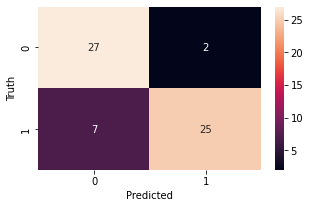

In [ ]:
plt.figure(figsize = (5,3))
sns.heatmap(conf, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 2- SVM

In [ ]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
  
predicted = model_svm.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)


print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[28  1]
 [ 4 28]]
The accuracy of SVM is :  91.80327868852459 %


Text(24.0, 0.5, 'Truth')

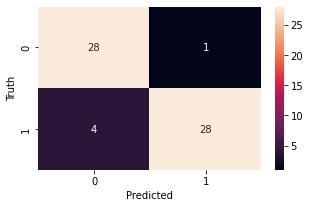

In [ ]:
plt.figure(figsize = (5,3))
sns.heatmap(conf, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 3-RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix : 
 [[27  2]
 [ 4 28]]
The accuracy of Random Forest is :  90.1639344262295 %


Text(24.0, 0.5, 'Truth')

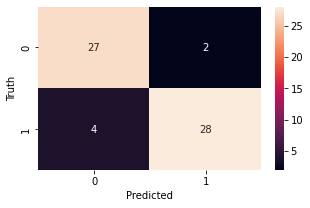

In [ ]:
plt.figure(figsize = (5,3))
sns.heatmap(conf, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# model SVM has the best Accuracy  

 ## save the model and scaler for deployment 

In [ ]:
import pickle

# save the scaler
pickle.dump(scaler, open('/content/drive/MyDrive/WTF-colab/scaler.pkl', 'wb'))

#### save the model 


In [ ]:
### Create a Pickle file 
import pickle
pickle_out = open("/content/drive/MyDrive/WTF-colab/model_svm.pkl","wb")
pickle.dump(model_svm, pickle_out)
pickle_out.close()

In [ ]:
# if you don't have scaler use this way 
"""input_data =(55,1,0,132.0,353.0,0,1,132,1,1.2,1	,1,3,97.5)

# change the type to numpy array 
input_data_numpy = np.asarray(input_data)  
input_data_numpy=input_data_numpy.reshape(1,-1)

result = model_svm.predict (input_data_numpy)

if (result[0]==0):
  print( "no heart attake")
else :
  print('possiblity of heart attake')
"""

no heart attake


In [ ]:
input_data =[[57,1,2,150.0,126.0,1,1,173,0,0.2,2,1,3,97.5]]
input_data = scaler.transform(input_data)
input_data

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.28670548,  0.73145871,  0.9664929 ,  1.15678564, -2.50060718,
         2.55563104,  0.89002765,  1.04145078, -0.6591842 , -0.71592277,
         0.96543644,  0.33330663,  1.14050171, -0.0137116 ]])

In [ ]:
 
input_data_numpy=input_data.reshape(1,-1)

result = model_svm.predict (input_data_numpy)
print (result)
if (result[0]==0):
  print( "no heart attake")
else :
  print('possiblity of heart attake')


[1]
possiblity of heart attake
